Analisis casos manuales

In [2]:
import os
import pandas as pd
import datetime
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

username = os.getlogin()
hoy = datetime.datetime.now()
date_formatcarga = "%d.%m.%Y"
date_formatexport = "%d-%m-%Y"
fecha_actual = hoy.strftime(date_formatcarga)
df1 = pd.DataFrame
file_path = 'C:\\Users\\' + username + '\\Documents\\Py\\CASOS\\tablacasos.csv'
df1 = pd.read_excel('C:\\Users\\' + username + '\\Documents\\Py\\CASOS\\tablacasos.xlsx',
                    sheet_name='Historial casos Manuales',header=0,
                    names=['caso','agencia','tdep','contacto','asunto','cierre','montocierre','depositado','banco','user','fapertura','fmod','alias','usermod'])
#df1 = pd.read_csv(file_path,
#                    header=0,
#                    names=['caso','agencia','tdep','contacto','asunto','cierre','montocierre','depositado','banco','user','fapertura','fmod','alias','usermod'])
df1['tdep'] = df1['tdep'].astype(str)
df1.fillna('null', inplace=True)
df1['fapertura'] = pd.to_datetime(df1['fapertura'],format = 'mixed')
df1['fmod'] = pd.to_datetime(df1['fmod'],format = 'mixed')
print("Tabla cargada.")

Tabla cargada.


C:\Users\dxs81864\AppData\Local\Temp\ipykernel_20752\1502413099.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.fillna('null', inplace=True)


Obtener la cantidad de casos cerrados

In [3]:
count_df1 = df1[df1['usermod'].str.contains('ioliv')].groupby('usermod').size().reset_index(name='count')
count_df2 = df1[df1['usermod'].str.contains('procom')].groupby('usermod').size().reset_index(name='count')
count_df3 = df1[df1['usermod'].str.contains('sysadmin')].groupby('usermod').size().reset_index(name='count')
count_df = pd.concat([count_df1,count_df2,count_df3])
sorted_df2 = count_df2
print(count_df)
print(f"Total casos operador: {(sum(count_df['count']))}")                                                            

  usermod  count
0   ioliv   1054
0  procom    146
Total casos operador: 1200


Obtener cantidad de casos creados por usuario

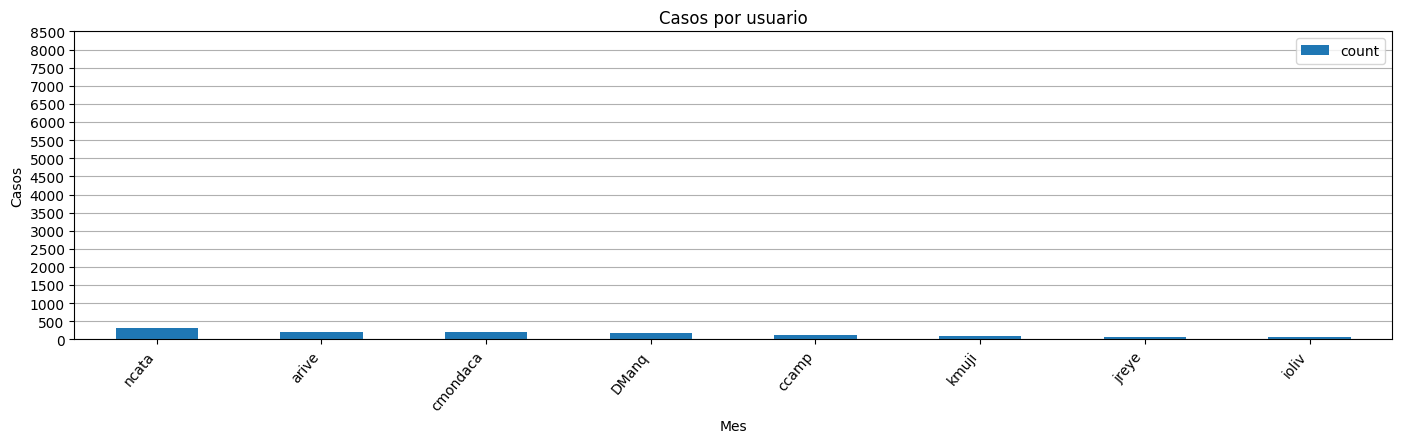

In [4]:
count_cpu= df1.groupby('user').size().reset_index(name='count').sort_values(by='count', ascending=False)
count_cpu = count_cpu.set_index('user')
count_cpu = count_cpu[count_cpu['count'] > 50]
count_cpu.plot.bar(title='Casos por usuario',xlabel='Mes',ylabel='Casos',figsize=(17,4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{int(x/1000000):,}'))
plt.xticks(rotation=50, ha='right')
plt.grid(axis='y')
plt.yticks(np.arange(0,9000,step=500))
plt.show()

In [5]:
dfc = df1.copy()
count_df = dfc.loc[dfc['fapertura'] > '2024-01-01']
count_df = count_df[count_df['tdep'].str.contains('')].groupby('tdep').size().reset_index(name='count')
sorted_df = count_df.sort_values(by='count', ascending=False)
print (sorted_df)
sorted_df.to_csv('C:\\Users\\dxs81864\\Documents\\Py\\CASOS\\GENERADOS\\Pdc ' + fecha_actual + '.csv',
               sep=';',
               header=False,
               index=False)
print(f"Total casos: {(sum(count_df['count']))}")  
                                  

                                 tdep  count
7                        Parcializado    781
9           Pendiente (Evidencia DPT)    174
11                   Problema cartola    121
13                           Sobrante     87
5                   Pago Saldo Ajuste     63
14                                nan     61
6                       Pago en S.com     41
2     Depósito cubre más de un Cierre     20
4                            Faltante     11
0                        Abono Cierre     10
8          Parcializado no autorizado      5
3   Erróneo (Destinatario incorrecto)      2
10               Plan de contingencia      2
12         Problema cartola histórica      2
1                      Abono Faltante      1
Total casos: 1381


Obtener la ocurrencia de tipo de caso

Reemplazar tipo de caso y periodicidad

In [6]:
tipocaso = 'Parcializado'
fechadesde = '2022-01-01'
periodicidad = 'm'
periodicity = df1[df1['tdep'].str.contains(tipocaso)]
periodicity = periodicity.loc[periodicity['fapertura'] > fechadesde]
periodicity = periodicity.groupby(df1['fapertura'].dt.to_period(periodicidad))['tdep'].count()
count = periodicity.resample(periodicidad).sum()
#print(count)
print(count.mean())

60.46153846153846


C:\Users\dxs81864\AppData\Local\Temp\ipykernel_20752\1185274178.py:6: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  periodicity = periodicity.groupby(df1['fapertura'].dt.to_period(periodicidad))['tdep'].count()
C:\Users\dxs81864\AppData\Local\Temp\ipykernel_20752\1185274178.py:7: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  count = periodicity.resample(periodicidad).sum()
C:\Users\dxs81864\AppData\Local\Temp\ipykernel_20752\1185274178.py:7: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  count = periodicity.resample(periodicidad).sum()


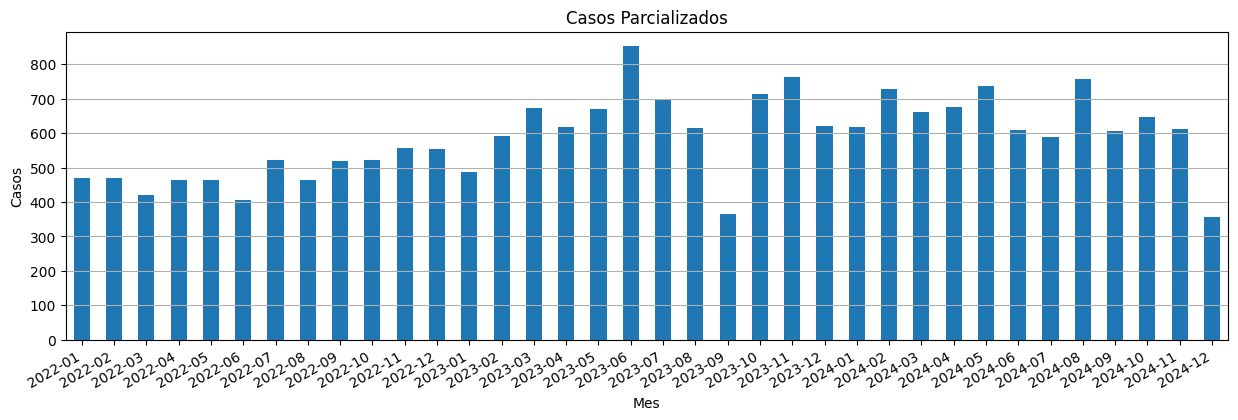

In [4]:
count.plot.bar(title='Casos Parcializados',xlabel='Mes',ylabel='Casos',figsize=(15,4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{int(x/1000000):,}'))
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
#plt.yticks(np.arange(-40000000,170000000,step=10000000))
plt.show()

Casos por alias

In [7]:
dfalias = df1[df1['user'].str.contains('autocase')]

Obtener ocurrencia por agencia de casos parcializados por agencia agrupado según mes

In [7]:
df_parc = df1.loc[df1['fapertura'] > '2024-09-01']
df_parc = df_parc[df_parc['tdep'].str.contains('Parcializado')]
df_conteoparc = df_parc.groupby([pd.Grouper(key='agencia')]).size().reset_index(name='periodicity')
df_conteoparc = df_conteoparc.sort_values(by=['periodicity','agencia'], ascending=[False,False])
#df_conteoparc.drop_duplicates(subset='agencia',keep='first', inplace=True)
print(df_conteoparc)


      agencia  periodicity
89   20042500           27
88   20042310           22
105  21042890           19
65   19052570           19
11    8119007           19
..        ...          ...
6     4502081            1
4      765007            1
3      249000            1
2         120            1
0          53            1

[192 rows x 2 columns]


Agencias Parcializados

In [ ]:
df_conteoparcmuestra = df_conteoparc[df_conteoparc['periodicity'] > 15].set_index('agencia')
df_conteoparcmuestra.plot.bar(title='Casos Parcializados',xlabel='Agencias',ylabel='Casos',figsize=(15,4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{int(x/1000000):,}'))
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
#plt.yticks(np.arange(-40000000,170000000,step=10000000))
plt.show()

In [68]:
df_conteoparctotal = df_conteoparc.groupby('agencia')['periodicity'].sum().reset_index()
df_conteoparctotal = df_conteoparctotal.sort_values(by='periodicity', ascending=False)

Tabla de casos pre-conciliados

In [13]:
dfc = df1.copy()
dfc = dfc.loc[dfc['fapertura'] > '2024-01-01']
dfpc = dfc[dfc['tdep'].str.contains('Problema cartola')]
dfc = dfc[~dfc['tdep'].str.contains('Problema cartola')|dfc['tdep'].str.contains('Plan de contingencia')] 
#dfc = dfc[~dfpc['caso'].isin(dfc['caso'])]
periodicity = dfc[dfc['usermod'].str.contains('procom') | dfc['usermod'].str.contains('Sysadmin')].groupby(dfc['fapertura'].dt.to_period('D'))['caso'].count()
periodicitypc = dfc[dfc['tdep'].str.contains('Problema cartola')].groupby(dfc['fapertura'].dt.to_period('D'))['caso'].count()
dfc_plot = periodicity.copy().resample('m').sum()
dfpc_plot = periodicitypc.copy().resample('m').sum()
#dfc = dfc[~dfpc.isin(dfc)]

C:\Users\dxs81864\AppData\Local\Temp\ipykernel_11484\2591607470.py:8: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  dfc_plot = periodicity.copy().resample('m').sum()
C:\Users\dxs81864\AppData\Local\Temp\ipykernel_11484\2591607470.py:8: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  dfc_plot = periodicity.copy().resample('m').sum()
C:\Users\dxs81864\AppData\Local\Temp\ipykernel_11484\2591607470.py:9: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  dfpc_plot = periodicitypc.copy().resample('m').sum()
C:\Users\dxs81864\AppData\Local\Temp\ipykernel_11484\2591607470.py:9: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  dfpc_plot = periodicitypc.copy().resample('m').sum()


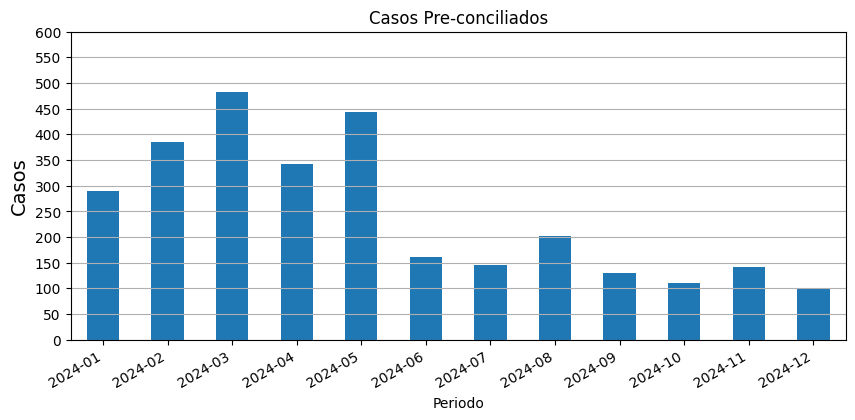

In [14]:
dfc_plot.plot(kind='bar',x='count', figsize=(10,4))
plt.title('Casos Pre-conciliados')
plt.xlabel('Periodo')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Casos', fontsize = 14)
plt.yticks(np.arange(0,650,step=50))
plt.grid(axis='y')
arrcasos = dfc_plot.to_numpy()
#for i, v in enumerate(y):
#    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
#myFmt = mdates.DateFormatter('%b/%Y')
#plt.gca().xaxis.set_major_formatter(myFmt)
#plt.xticks(np.arange('2023-12', '2024-12', dtype='datetime64[M]'),rotation=10, ha='right')
plt.show()

In [ ]:
tipos_tdep = df1['tdep'].unique()
tipos_user = df1['user'].unique()
tipos_user = df1['user'].unique()
tipos_agencia = df1['agencia'].unique()

In [ ]:
print(tipos_tdep)

In [ ]:
print(tipos_user)

In [ ]:
print(tipos_user)